In [5]:
import tensorflow as tf
import os

In [6]:
import cv2
import imghdr

In [7]:
data_dir = 'data'
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [4]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

KeyboardInterrupt: 

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 4502 files belonging to 12 classes.


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

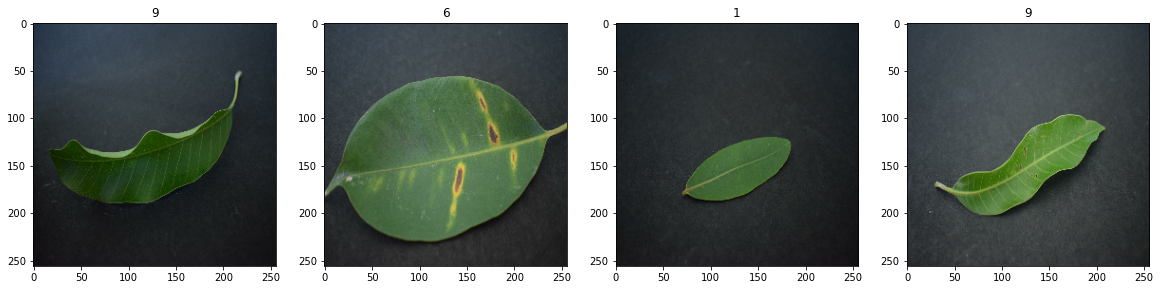

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
data.as_numpy_iterator().next()

(array([[[[0.09764859, 0.11333486, 0.11725643],
          [0.09192708, 0.10761335, 0.11153492],
          [0.10281863, 0.1185049 , 0.12242647],
          ...,
          [0.07842372, 0.09803156, 0.11371783],
          [0.08084406, 0.1004519 , 0.11613818],
          [0.06551777, 0.08512561, 0.10081188]],
 
         [[0.09865196, 0.11433823, 0.12610294],
          [0.10196079, 0.11764706, 0.12156863],
          [0.08566176, 0.10134804, 0.10526961],
          ...,
          [0.07865349, 0.09826133, 0.11394761],
          [0.07794118, 0.09754902, 0.11323529],
          [0.07095588, 0.09056372, 0.10625   ]],
 
         [[0.07488511, 0.09057138, 0.09449296],
          [0.08073682, 0.0964231 , 0.10034467],
          [0.10788143, 0.12356771, 0.13533242],
          ...,
          [0.06666667, 0.08627451, 0.10196079],
          [0.07392003, 0.09352788, 0.10921416],
          [0.06752451, 0.08713235, 0.10281863]],
 
         ...,
 
         [[0.0627451 , 0.04313726, 0.05882353],
          [0.07269

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [16]:
train_size

98

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [18]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [24]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
98/98 [==============================] - 225s 2s/step - loss: -583702282240.0000 - accuracy: 0.1014 - val_loss: -1191854604288.0000 - val_accuracy: 0.1004
Epoch 2/20
98/98 [==============================] - 226s 2s/step - loss: -2394514259968.0000 - accuracy: 0.1004 - val_loss: -4147431866368.0000 - val_accuracy: 0.0971
Epoch 3/20
98/98 [==============================] - 228s 2s/step - loss: -7130951712768.0000 - accuracy: 0.0992 - val_loss: -11090805129216.0000 - val_accuracy: 0.1016
Epoch 4/20
98/98 [==============================] - 224s 2s/step - loss: -17045460615168.0000 - accuracy: 0.1004 - val_loss: -24983619239936.0000 - val_accuracy: 0.0971
Epoch 5/20
98/98 [==============================] - 228s 2s/step - loss: -35836494086144.0000 - accuracy: 0.0998 - val_loss: -50095852617728.0000 - val_accuracy: 0.0949
Epoch 6/20
98/98 [==============================] - 226s 2s/step - loss: -67165206085632.0000 - accuracy: 0.0995 - val_loss: -88231529938944.0000 - val_accuracy:

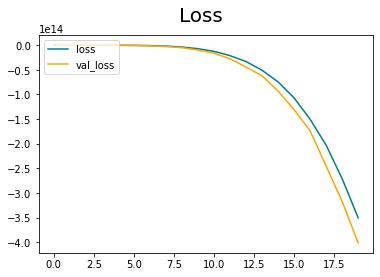

In [40]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

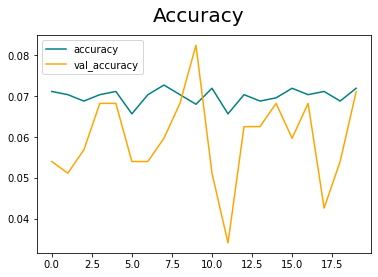

In [41]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()